This data was useless because the roach1 LO was being set instead of the mark2 LO. File deleted.

In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import nc

In [9]:
from collections import namedtuple
ResonatorData = namedtuple('ResonatorData', field_names=['f_data', 's21_data',
                                                         'f_model', 's21_model',
                                                         'f_r', 's21_r'])

def extract(resonator, normalize, num_model_points):
    f_data = resonator.frequency.copy()
    s21_data = resonator.data.copy()
    f_model = np.linspace(f_data.min(), f_data.max(), num_model_points)
    s21_model = resonator.model.eval(params=resonator.current_params, f=f_model)
    f_r = resonator.f_0
    s21_r = resonator.model.eval(params=resonator.current_params, f=f_r)
    if normalize:
        s21_data = resonator.remove_background(frequency=f_data, s21_raw=s21_data)
        s21_model = resonator.remove_background(frequency=f_model, s21_raw=s21_model)
        s21_r = resonator.remove_background(frequency=f_r, s21_raw=s21_r)
    return ResonatorData(f_data, s21_data, f_model, s21_model, f_r, s21_r)

    
def amplitude(axis, resonator, normalize=False, num_model_points=1000, f_scale=1e-6, three_ticks=True):
    rd = extract(resonator, normalize, num_model_points)
    ax.plot(f_scale * rd.f_data, 20 * np.log10(np.abs(rd.s21_data)), '.b', markersize=2)
    ax.plot(f_scale * rd.f_model, 20 * np.log10(np.abs(rd.s21_model)), '-', color='brown')
    ax.plot(f_scale * rd.f_r, 20 * np.log10(np.abs(rd.s21_r)), '.', color='brown', markersize=3)
    if three_ticks:
        ax.set_xticks(f_scale * np.array([rd.f_data.min(), rd.f_r, rd.f_data.max()]))


In [3]:
ncf = nc.NCFile('/data/detectors/2016-08-05_193023_sweep_stream_on_off.nc')

In [4]:
ncf.node_names()

[u'SingleSweepStream0',
 u'SingleSweep1',
 u'SingleStream2',
 u'ADCSnap3',
 u'SingleSweepStream4',
 u'SingleSweep5',
 u'SingleStream6',
 u'ADCSnap7',
 u'SingleSweepStream8',
 u'SingleSweep9',
 u'SingleStream10',
 u'ADCSnap11',
 u'SingleSweepStream12',
 u'SingleSweep13',
 u'SingleStream14',
 u'ADCSnap15',
 u'SingleSweepStream16',
 u'SingleSweep17',
 u'SingleStream18',
 u'ADCSnap19',
 u'SingleSweepStream20',
 u'SingleSweep21',
 u'SingleStream22',
 u'ADCSnap23',
 u'SingleSweepStream24',
 u'SingleSweep25',
 u'SingleStream26',
 u'ADCSnap27',
 u'SingleSweepStream28',
 u'SingleSweep29',
 u'SingleStream30',
 u'ADCSnap31',
 u'SingleSweepStream32',
 u'SingleSweep33',
 u'SingleStream34',
 u'ADCSnap35',
 u'SingleSweepStream36',
 u'SingleSweep37',
 u'SingleStream38',
 u'ADCSnap39',
 u'SingleSweepStream40',
 u'SingleSweep41',
 u'SingleStream42',
 u'ADCSnap43',
 u'SingleSweepStream44',
 u'SingleSweep45',
 u'SingleStream46',
 u'ADCSnap47',
 u'SingleSweepStream48',
 u'SingleSweep49',
 u'SingleStream50'

In [5]:
all_sss = [ncf.read(name) for name in ncf.node_names() if name.startswith('SingleSweepStream')]

In [18]:
all_snaps = [ncf.read(name) for name in ncf.node_names() if name.startswith('ADCSnap')]

In [21]:
[snap.x.ptp() for snap in all_snaps]

[25.0,
 14.0,
 11.0,
 10.0,
 24.0,
 12.0,
 10.0,
 8.0,
 24.0,
 13.0,
 11.0,
 9.0,
 24.0,
 12.0,
 9.0,
 8.0,
 24.0,
 13.0,
 9.0,
 10.0,
 24.0,
 12.0,
 9.0,
 9.0,
 24.0,
 12.0,
 10.0,
 9.0,
 23.0,
 13.0,
 8.0,
 10.0]

In [20]:
[snap.y.ptp() for snap in all_snaps]

[24.0,
 13.0,
 10.0,
 10.0,
 25.0,
 11.0,
 10.0,
 8.0,
 24.0,
 13.0,
 11.0,
 8.0,
 23.0,
 13.0,
 9.0,
 8.0,
 23.0,
 12.0,
 9.0,
 9.0,
 25.0,
 12.0,
 9.0,
 10.0,
 24.0,
 11.0,
 11.0,
 8.0,
 23.0,
 12.0,
 9.0,
 9.0]

In [32]:
num_attenuations = 4
num_channels = 8
sss_dict = {}
for channel in range(num_channels):
    sss_dict[channel] = all_sss[channel * num_attenuations:(channel + 1) * num_attenuations]

In [35]:
sss_dict[0]

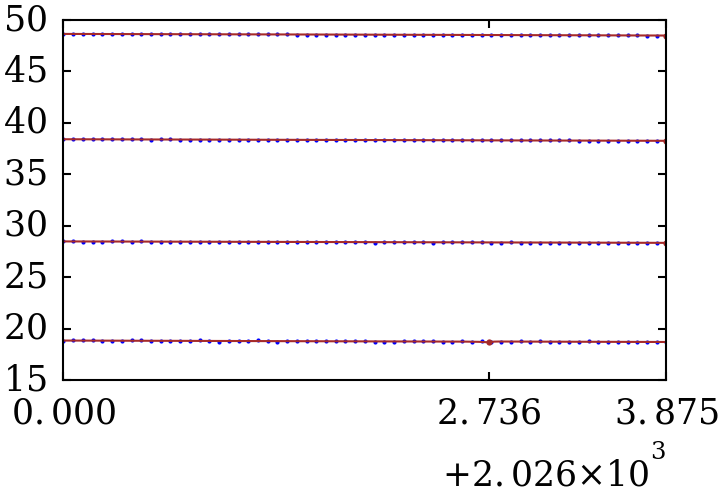

In [44]:
number = 0
fig, ax = plt.subplots()
for sss in sss_dict[number]:
    amplitude(ax, sss.resonator)